In [13]:
import pandas as pd
import time
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [17]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
import re

# Set up Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='68cdc51122f14430a49f7f54a4126938',
                                                           client_secret='3b10490f95c04d97b2064d56788ff8f1'))

playlist_id = '6yPiKpy7evrwvZodByKvM9'  # actual playlist ID

N = 0  # Initialize offset
d = []

for _ in range(20):  # set the number of pages to fetch
    results = sp.playlist_items(playlist_id, limit=50, offset=N)

    for idx, track in enumerate(results['items']):
        track_info = track['track']
        
        # Handle None values for 'preview_url' and 'id'
        preview_url = track_info.get('preview_url')
        track_id = track_info.get('id')
        
        d.append({
            'Track': track_info['name'],  # TRACK INFO
            'Album': track_info['album']['name'],  # ALBUM INFO ECT ...
            'Artist': track_info['artists'][0]['name'],
            'Release Date': track_info['album']['release_date'],
            'Track Number': track_info['track_number'],
            'Popularity': track_info['popularity'],
            'Explicit': track_info['explicit'],
            'Duration': track_info['duration_ms'],
            'Audio Preview URL': preview_url,
            'Track ID': track_id,  # Track ID added
        })

    N += 50  # Increment offset for the next page

df = pd.DataFrame(d)

# Function to get audio features with retries and exponential backoff
def get_audio_features(track_ids, retries=3):
    features = []
    for retry_count in range(retries):
        try:
            batch_features = sp.audio_features(track_ids)
            if batch_features is not None:
                features.extend(batch_features)
                return features
        except spotipy.SpotifyException as e:
            if e.http_status == 429:
                print(f"Rate limit exceeded. Retrying in {2 ** retry_count} seconds...")
                time.sleep(2 ** retry_count)
            else:
                print(f"An error occurred: {e}")
                time.sleep(5)  # Add a delay before retrying
    return None

# Get track IDs from the DataFrame
track_ids = df['Track ID'].dropna().tolist()

# Get audio features in batches
batch_size = 50
for i in range(0, len(track_ids), batch_size):
    batch_track_ids = track_ids[i:i + batch_size]
    batch_features = get_audio_features(batch_track_ids)

    if batch_features is not None:
        valid_features = [feat for feat in batch_features if feat is not None]
        
        # Process the valid_features as needed
        for index, feature in enumerate(valid_features):
            df.at[i + index, 'Danceability'] = feature.get('danceability')
            df.at[i + index, 'Energy'] = feature.get('energy')
            df.at[i + index, 'Speechiness'] = feature.get('speechiness')
            df.at[i + index, 'Acousticness'] = feature.get('acousticness')
            df.at[i + index, 'Instrumentalness'] = feature.get('instrumentalness')
            df.at[i + index, 'Liveness'] = feature.get('liveness')
            df.at[i + index, 'Valence'] = feature.get('valence')
            df.at[i + index, 'Tempo'] = feature.get('tempo')

# Display the DataFrame with track information, Track IDs, and audio features
print(df)

Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 1 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 2 seconds...


Max Retries reached


Rate limit exceeded. Retrying in 4 seconds...
                             Track  \
0                               2K   
1                  4 Billion Souls   
2                 4 Minute Warning   
3                        7 Element   
4                         #9 Dream   
..                             ...   
995  Garden of England - Interlude   
996                       Gasoline   
997                         Gaston   
998                     Gatekeeper   
999   Gathering All the Lost Loves   

                                                 Album             Artist  \
0    Get Physical Music Presents: Body Language, Vo...        Nosaj Thing   
1                                          Full Circle          The Doors   
2                                 In Rainbows (Disk 2)          Radiohead   
3                                Philosophy of Miracle              Vitas   
4    Instant Karma: The Amnesty International Campa...             R.E.M.   
..                                 

In [18]:
df

,Track,Album,Artist,Release Date,Track Number,Popularity,Explicit,Duration,Audio Preview URL,Track ID
0,2K,"Get Physical Music Presents: Body Language, Vo...",Nosaj Thing,2016-04-01,17,0,False,152560,None,33xMbeHzmWd6Od0BmLZEUs
1,4 Billion Souls,Full Circle,The Doors,1972-07-17,2,26,False,197706,https://p.scdn.co/mp3-preview/d6645e0eeb0f6849...,3UnyplmZaq547hwsfOR5yy
2,4 Minute Warning,In Rainbows (Disk 2),Radiohead,2007-12-03,8,0,False,244284,None,1w8QCSDH4QobcQeT4uMKLm
3,7 Element,Philosophy of Miracle,Vitas,2001,2,0,False,249939,None,7J9mBHG4J2eIfDAv5BehKA
4,#9 Dream,Instant Karma: The Amnesty International Campa...,R.E.M.,2007-06-11,47,6,False,278320,https://p.scdn.co/mp3-preview/1902adb4d960b913...,1VZedwJj1gyi88WFRhfThb
...,...,...,...,...,...,...,...,...,...,...
995,Garden of England - Interlude,This Is All Yours,alt-J,2014-09-22,6,34,False,67684,https://p.scdn.co/mp3-preview/8fb2eaa86288943c...,6onmdzTxsisLDtItnIS5WV
996,Gasoline,Gasoline,Alpine,2012-06-25,1,0,False,201820,None,2xXaSJNH5LfCXz5FHhnoSg
997,Gaston,La foire et l'ordre,Philippe Brach,2014-04-22,9,0,False,225480,None,1DOiWHcSHnJViGkHTQzwZB
998,Gatekeeper,Let It Die,Feist,2004-05-25,1,0,False,135946,None,7mawP3kgmL66EZzNds5KiD


In [19]:
df1 = df['Track ID']

In [26]:
df1 = df1.dropna()

In [29]:
# ytry to get the UDIO FEATURE in a data frame but got limitation from spotify so will use a data from kaggles

song_ids = df1.tolist()

song_features = []
batch_size = 10

for i in range(0, len(song_ids), batch_size):
    batch_song_ids = song_ids[i:i+batch_size]
    batch_features = sp.audio_features(batch_song_ids)


    if batch_features is not None:
        valid_features = [feat for feat in batch_features if feat is not None]
        song_features.extend(valid_features)

    time.sleep(0.1) 

df_features = pd.DataFrame(song_features)

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=33xMbeHzmWd6Od0BmLZEUs,3UnyplmZaq547hwsfOR5yy,1w8QCSDH4QobcQeT4uMKLm,7J9mBHG4J2eIfDAv5BehKA,1VZedwJj1gyi88WFRhfThb,3DSmOF7ETJHAQEqqgoSJao,5HPnumlogzZtpLEaORZjz1,6i99ThziImjuFABb8rUQvy,0nkLI0pdyTRpq7BsTFBufZ,6Yu1OL8I0D4vjOzYdsXYGK:
 Max Retries, reason: too many 429 error responses

In [30]:
# another tryies but still not wokring 

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='68cdc51122f14430a49f7f54a4126938',
                                                           client_secret='3b10490f95c04d97b2064d56788ff8f1'))

# Assuming you have a list of track IDs named song_ids
song_ids = df1.tolist()

# Function to get audio features for a single track
def get_audio_features(track_id):
    try:
        features = sp.audio_features(track_id)
        return features[0] if features else None
    except spotipy.SpotifyException as e:
        print(f"An error occurred: {e}")
        return None

# Get audio features for each track ID
audio_features_list = [get_audio_features(track_id) for track_id in song_ids]

# Create a DataFrame for audio features
audio_features_df = pd.DataFrame(audio_features_list)

# Display the resulting DataFrame
print(audio_features_df)


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=33xMbeHzmWd6Od0BmLZEUs:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3UnyplmZaq547hwsfOR5yy:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1w8QCSDH4QobcQeT4uMKLm:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7J9mBHG4J2eIfDAv5BehKA:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1VZedwJj1gyi88WFRhfThb:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3DSmOF7ETJHAQEqqgoSJao:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5HPnumlogzZtpLEaORZjz1:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6i99ThziImjuFABb8rUQvy:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=0nkLI0pdyTRpq7BsTFBufZ:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6Yu1OL8I0D4vjOzYdsXYGK:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2HvTGx5fzFGpHSyRNvXd9T:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2XS4lIQ1bl9KSNsYtkqK46:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6dsq7Nt5mIFzvm5kIYNORy:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1wKGGfnznnXIvupuEZt9mM:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7Jjqx75QRHaYsxF5WnHovC:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7BIPYQPHbPVDE9UsA0eT72:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4KEw5m7CZXVbpWbHVK4OrV:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2YTRLoG5jdzCp4yg3B6OnH:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5MPryR3oJGmWnSYM7X2GGE:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4ymUtICOpIlyvFf3URM7XZ:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2lffRiAET2Xt6BNb4EmkS2:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3oQ52Mqz2ih8KjligVoQrG:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5h8G81Ls00kyf1UEen0gBB:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6Tq4LginUMBOgZrUs8M40h:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7ynvnjTj1XI8ByUq3F8MUw:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4wHh4AljzbSGMJvynLgK1q:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2UFEbNhbk9GsxCigXPq3XI:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7IcXkPWjwqUCCkI2mUf02h:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1595LW73XBxkRk2ciQOHfr:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2vEkF5UazjaBL6CpG2BZgq:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6GWS0Nb3ybf3tQXZ0FlfZf:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5FcjGGKpQx6dvuGcbAcFtC:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4YpfqCRwb3ttShlTNaB2jU:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=00fyPXxe2SCBHnFwEO9Eh1:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=691jw4auDZjaTOwUJmtoSy:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4dkoqJrP0L8FXftrMZongF:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2Yh0H2OXI2UItG9GGfQzlK:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=0IxxqsYBcCHEQ1HqLYJnwx:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1aQmitUScES0kpdge6BtF4:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7or26qS3BfpTtWO3BFw5GE:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=22cDldSuj9rgIMXwn4Ofn0:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5MbRyPfgokD3c6nxCV7TFG:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3H3cOQ6LBLSvmcaV7QkZEu:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3Vef8GlFWEzrP23UwHjWWl:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6D43oUO6nImERk2psfXdNY:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7H819kvtogxVpKDFplUFKc:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=67kwRadxmmURPuWIpEyymY:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1FEYWXG23hr3m2vXHpbZeq:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1SfOQKZv0c9FqNXd2Kjt6P:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3OUpVpFeNx5jeInhHqiNfs:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2zsz6dip4W83IlAgp2zP4Y:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3OsUjkcv1C1v5udFhgRSFg:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2Ol6GoKiAvPOyk52QIQvf7:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1mYPdmzGjsYpWnFF2XO3MJ:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4knSB7lhQAtO6UqUeaGox8:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=27U2Idl2Jl63dltNrgP6rm:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=0HadrlP2mwJidGF3pyBX4H:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1PH5Es89c1cENU8WVuWwbp:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=22ZIa4vKhUFzb4YZqp7g94:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5GRhjCK4XgTajZvcP8FsRw:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2hkfe7ug1Wabzapt5HQec4:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1Lwux3cAXrUG3UWjUEGteT:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=62nFeTispaiYq1KzGrONsl:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=51ygW389BW4Dut3B69pSwc:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=0MOMLuhHqNgJ7uAceOPmfj:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5tztLBvTlNC15Np2tnQ5Ll:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3rrtbnOBDzKQfyYKTezEFe:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5dIZa3pwSn1vDenZpSBEFO:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2vCsB0tzKlAtsSwB4NBprX:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7j021TxcicWprdXpCcMBeH:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=4joiWvli4qJVEW6qZV2i2J:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2NsQgzcCEy9hZbHaBG4Xfy:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2Wb9ejnmy27DUTUe9YF5Ew:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=1zwB5h9WqvAlOTOUapSNSe:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6g4jkJItHpKs8Ljwt0EEMx:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=40WXqoyOLAAugGmJWZU1FY:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7uFZNMEZzAGOwQ6EZID1K4:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=5OojmQ36TXkfL2JfoFJcaq:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=0kYUrLVQOfx21xuXu7OGrT:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=25RYJGPnetSkV8le7TeJnR:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7hneDPwMWHSDxFZTaiGbaT:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2ck8lFrYAch2GPtdhpTHe3:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6ZMu3XuSt70jbJa7OfHN7X:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=7BYRb9EJ90vcBmTHMvmQvm:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=3oGGipilQmZTol8qFTR6u1:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=2Z8cY4QpZTFUZxCQCpvNe1:
 Max Retries, reason: too many 429 error responses


Max Retries reached


An error occurred: http status: 429, code:-1 - /v1/audio-features/?ids=6tzFM08UuwxhuftjfUqaQA:
 Max Retries, reason: too many 429 error responses


In [3]:
import pandas as pd 

# reading the data frame with audio feature 

df_song = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

In [4]:
df_song

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [11]:
# Now that I got my data Frame I will submit it into a PCA model to gte the cluster number

# first let fit the data in X axis

X = df_song[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','popularity']]

In [12]:
# using scaler to scale data Frame before using model on it 


from sklearn.preprocessing import StandardScaler
# creat the scaler

scaler = StandardScaler()
# fit th scaler 
scaler.fit(X)

# finnaly transform 

X_scaled = scaler.transform(X)

X_scaled 

array([[-0.97408012,  0.84982596,  0.20900459, ...,  0.23525146,
        -1.24143967, -0.46715031],
       [-0.92032465,  1.39171405,  0.01759476, ...,  0.23525146,
        -0.26490155, -1.22806504],
       [-0.91858874,  0.11327905, -0.59859825, ...,  0.23525146,
        -0.22244337,  1.61268329],
       ...,
       [-0.03616588,  0.71303868, -0.59634092, ...,  0.23525146,
         0.41056949,  1.15613445],
       [-0.96806228,  1.00239639, -0.26487136, ...,  0.23525146,
        -1.40548264,  1.3083174 ],
       [ 0.59744266,  0.70251658, -0.54245743, ..., -1.708757  ,
         2.07029832,  1.56195565]])

In [13]:
# let do the PCA

from sklearn.decomposition import PCA

# create pca object

pca = PCA(n_components = 3)

# fit the oject 
pca.fit(X_scaled)

# transform 
X_pca = pca.transform(X_scaled)

X_pca

array([[-0.99552091, -0.40098391,  1.06548311],
       [-1.67280037, -0.83542329, -0.84033072],
       [-1.37380436,  0.15062524, -0.71285852],
       ...,
       [-1.25201792, -1.04455679, -0.81930363],
       [-0.75642697,  0.00398387, -0.11200472],
       [-1.41336097, -1.02481314,  1.64026378]])

In [15]:
# lets do the model to get the clusters 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8, random_state = 42) 
kmeans.fit(X_pca)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [17]:
#  to predict cluster 
cluster = kmeans.predict(X_pca)

In [18]:
# Array wioth the ckluster 

cluster

array([7, 0, 5, ..., 0, 5, 7])

In [19]:
pd.Series(cluster).value_counts()

7    24950
5    19592
4    19157
2    18092
0    17025
6    13196
1     9538
3     9113
Name: count, dtype: int64

In [20]:
# get the inertia to see when the cluster are tending to get to 0

kmeans.inertia_

201923.51948415814

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

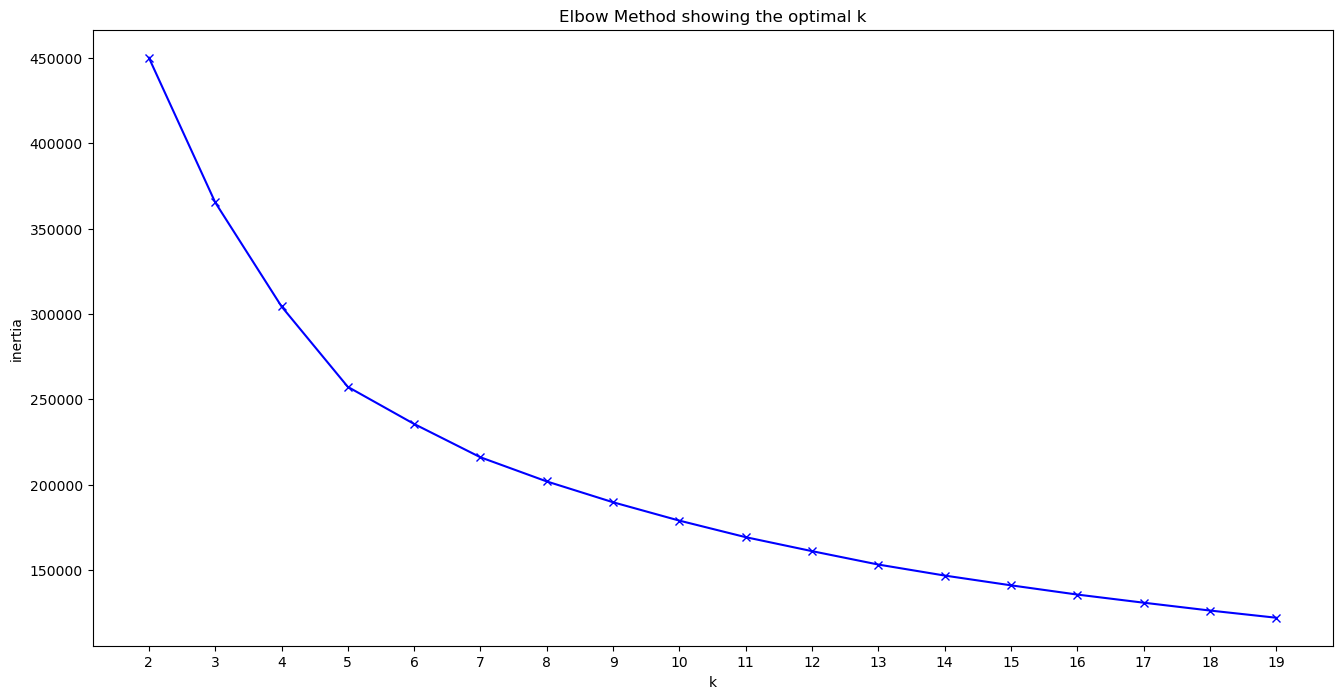

In [22]:
import numpy as np
K = range(2, 20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# using elbow method to check the best number of cluster whit the graph we can see that  the best number of cluster is 5 or 8 